In [0]:
%tensorflow_version 1.x

# MFCC(Mel-Frequency Cepstral Coefficient)
* 음성/음악 등 오리오 신호 처리 분야에서 널리 쓰이는 **특징값(Feature)** 중 하나
* 주로 **음성 인식, 화자 인식, 음성 합성, 음악 장르 분류** 등 오디오 도메인 문제를 해결하는데 사용

### 실제 사용 예시
1. 화자 검증(Speaker Verification)  
   화자 인식(Speaker Recognition)의 세부 분류로서 **말하는 사람이 그 사람이 맞는지** 확인
   ![image](https://user-images.githubusercontent.com/38516906/75852128-a18b7800-5e2e-11ea-830d-72a72855d307.png)

2. 음악 장르 분류(Music Genre Classification)  
   음악의 feature를 MFCC를 통해 추출 후, 어떤 장르인지 파악
   ![image](https://user-images.githubusercontent.com/38516906/75852212-d39cda00-5e2e-11ea-8039-0bc984ad653b.png)


### MFCC의 기술적인 이해
Mel Spectrum(멜 스펙트럼)에서 Cepstral(켑스트럴) 분석을 통해 추출된 값  
다음의 용어들은 꼭 알아야 할 것
* Spectrum(스펙트럼)
* Cepstrum(켑스트럼)
* Mel Spectrum(멜 스펙트럼)

1) Spectrum(스펙트럼)  
   * 이해하기
     * 오디오 신호는 **시간**(가로축)에 따른 음압(세로축)의 표현, 즉 **시간 영역(time domain)**의 표현
     * 여기에 **FFT**를 수행하면 **주파수**(가로축)에 따른 음압(세로축)의 표현, 즉 **주파수 영역(frequency domain)**의 표현이 가능해지고, 그것이 **"Spectrum"**임
       ```
       * FFT(Fast Fourier Transform: 고속 푸리에 변환)
       신호를 frequency로 변환하는 알고리즘
       기존의 이산 푸리에 변환(DFT)을 더욱 빠르게 수행할 수 있도록 최적화한 알고리즘
       ```
     * 각 주파수의 대역별 세기를 알 수 있음 -> 신호에서 어떤 주파수가 강하고 약한지 판별
   * spectrum에 어떤 정보가 있는가
     * 먼저, 악기 소리나 사람의 음성은 일반적으로 **배음(harmonics)** 구조를 가짐
       ```
       * 배음(harmonics) 구조
       소리는 한 가지의 주파수만으로 구성되지 않음
       기본 주파수(fundamental frequency)와 함께 기본 주파수의 정배수인 배음(harmonics)들로 구성됨

       예) 피아노 건반에서 4옥타브 '라'(440Hz) 음을 연주했다면,
           그 소리는 기본 주파수인 440Hz뿐만 아니라 그 정수배인 880Hz, 그 다음의 배음들까지 포함하고 있음
       ```
      ![image](https://user-images.githubusercontent.com/38516906/75853523-a4d43300-5e31-11ea-9bfa-098d3f77e36a.png)
    * 배음 구조는 악기나 성대의 구조에 따라 달라지며, **배음 구조의 차이가 음색의 차이를 만들어냄**
    * 즉, spectrum에서 **배음**구조를 유추해낼 수 있다면, 소리의 고유한 **특징**을 찾아낼 수 있을 것


2) Cepstrum(켑스트럼)
  * 이해하기
    * spectrum을 통해 소리의 고유한 **특징**을 추출할 수 있음  
      -> 그 정보를 추출할 때 사용하는 방법이 **Cepstral**분석
  * cepstral 분석 수행 과정  
    1. 먼저 일반적인 spectrum 그림을 살펴보자.
    ![image](https://user-images.githubusercontent.com/38516906/75854530-ca623c00-5e33-11ea-834d-5e30f78edf2a.png)
       * 그림에서 화살표로 지목된 **피크(peak)**들은 신호에서 **지배적인 주파수 영역**을 가리킴
       * 이 피크들을 포먼트(Formants)라고 함
         ```
         * 포먼트(Formants)
         소리가 공명되는 특정 주파수 대역

         사람의 음성은 성대(vocal folds)에서 형성되어 성도(vobal track)를 거치며 변형됨
         소리는 성도를 지나면서 포먼트를 만나 증폭되거나 감쇠됨

         즉, 포먼트는 배음(harmonics)과 만나 소리를 풍성하게 혹은 선명하게 만드는 필터 역할
         ```
      * 포먼트는 소리의 **특징**을 유추할 수 있는 중요한 단서
    2. 이러한 포먼트들을 연결한 곡선과 spectrum을 분리함
       ![image](https://user-images.githubusercontent.com/38516906/75855050-c8e54380-5e34-11ea-8f8c-165734c49e7a.png)
       * 여기서 나오는 곡선을 **Spectral Envelope**
       * **MFCC**는 이 둘을 분리하는 과정에서 도출됨
       * 이 때 사용하는 수학과 알고리즘이 **log**와 **IFFT**(Inverse FFT: 역 고속 푸리에 변환)

3) Mel Spectrum(멜 스펙트럼)
  * 이해하기
    * MFCC는 일반적인 spectrum이 아닌,  
      특수한 필터링을 거친 **Mel Spectrum**에 **Cepstral** 분석을 적용해 추출함
  * mel spectrum이 만들어지는 과정  
    1. 사람의 청각기관은 고주파수(high frequency)보다 **저주파수**(low frequency) 대역에서 더 민감함
    2. 사람의 이런 특성을 반영해, 물리적인 주파수와 **실제 사람이 인식하는 주파수**의 관계를 표현한 것이 바로 **"Mel Scale(멜 스케일)"**  
    3. 이 mel scale에 기반한 **Filter Bank**를 **Spectrum**에 적용하여 도출하면 mel spectrum이 생성됨  
      * mel scale은 filter bank를 나눌 때 어떤 간격으로 나눠야 하는지 알려주는 역할
      ![image](https://user-images.githubusercontent.com/38516906/75855598-fda5ca80-5e35-11ea-9141-a3da95c7d7c5.png)



### MFCC의 추출 과정 정리
![image](https://user-images.githubusercontent.com/38516906/75852445-54f46c80-5e2f-11ea-8024-1e121ef4378b.png)
1. **오디오 신호**를 프레임별(보통 20ms~40ms)로 나누어 **FFT**를 적용해 **Spectrum**을 구한다.
2. **Spectrum**에 **Mel Filter Bank**를 적용해 **Mel Spectrum**을 구한다.
3. **Mel Spectrum**에 **Cepstral**분석을 적용해 **MFCC**를 구한다.

### MFCC 추출해보기(Librosa 라이브러리 이용)
* 사용 전 주의 사항: ffmpeg 설치 여부 확인(음성 파일 로드 에러)

##### Load audio file


In [1]:
# Load audio file
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
%matplotlib inline

from google.colab import files
uploaded = files.upload()
y, sr = librosa.load("./안녕하세요.mp3") # y: time series data / sr: samplings per second of audio

Saving 안녕하세요.mp3 to 안녕하세요.mp3


In [3]:
# Check loaded audio file
IPython.display.Audio(data=y, rate=sr)

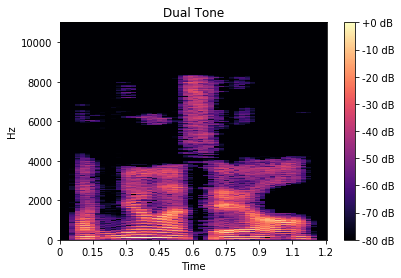

In [14]:
D = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Dual Tone')
plt.ylim(0, 11000)
plt.colorbar(format='%+02.0f dB')
plt.show()

# Reference
* MFCC 설명: https://brightwon.tistory.com/11
* MFCC 코드
  * https://banana-media-lab.tistory.com/entry/Librosa-python-library%EB%A1%9C-%EC%9D%8C%EC%84%B1%ED%8C%8C%EC%9D%BC-%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0
  * https://m.blog.naver.com/PostView.nhn?blogId=sexyit_2019&logNo=221603292906&proxyReferer=https%3A%2F%2Fwww.google.com%2F
  * https://datascienceschool.net/view-notebook/691326b7f88644f79ec7ddc9f27f84ec/
* Librosa 설명: https://librosa.github.io/librosa/index.html